<a href="https://colab.research.google.com/github/angelicaferriol/angelicaferriol/blob/main/Food_Chain_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Chain Performance Analysis

**Author:** Angelica Mae H. Ferriol | BSCS 3-5  

**Date:** September 16, 2025

**Course:** Application Development - Assessment 2  

## Summary

This study analyzes sales performance data from different food chains to identify operational patterns and strategic opportunities. Using a small dataset of records across four stores, we examine order distribution, sales composition, and revenue performance metrics. Key findings reveal significant variation in store performance and customer preferences that warrant strategic intervention.

## Research Questions

This study addresses the following research questions:

* **RQ1:** How does order volume vary across different store locations, and what factors might explain these differences?  

* **RQ2:** What is the composition of sales across different menu categories, and how can this inform menu strategy?  

* **RQ3:** What are the temporal patterns in sales performance across different time periods?  

* **RQ4:** How do unit prices vary across menu categories and what pricing optimization opportunities exist?  

* **RQ5:** How does sales performance vary across stores for different menu categories?

## 1. Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings

# Configure settings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load dataset
file_id = "18j2N8NSaKT1LgvuUIyk6yYsLOK_2L5C3"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print("\nFirst 5 rows:")
display(df.head())

Dataset loaded successfully!
Dataset shape: (500, 8)

Columns: ['OrderID', 'Store', 'MenuItem', 'Category', 'Quantity', 'UnitPrice', 'OrderDate', 'Total']

First 5 rows:


,OrderID,Store,MenuItem,Category,Quantity,UnitPrice,OrderDate,Total
0,1,Store C,Burger,Drink,1,9,2023-06-01,9
1,2,Store B,Pasta,Side,4,22,2023-06-02,88
2,3,Store C,Chicken,Drink,4,23,2023-06-03,92
3,4,Store C,Pizza,Side,1,20,2023-06-04,20
4,5,Store A,Burger,Side,1,3,2023-06-05,3


## 2. Data Cleaning and Preprocessing
Note: Although this is a small dataset, it's my practice to always include this section.


In [ ]:
# Data cleaning and preprocessing
print("Data Cleaning Summary:")
print(f"Initial dataset shape: {df.shape}")
print("Missing values per column:")
print(df.isnull().sum())

# Remove duplicates
before_duplicates = df.shape[0]
df = df.drop_duplicates()
after_duplicates = df.shape[0]
print(f"\nDuplicates removed: {before_duplicates - after_duplicates}")

# Handle outliers using IQR method
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
before_outliers = df.shape[0]
df = df[(df['Total'] >= (Q1 - 1.5 * IQR)) & (df['Total'] <= (Q3 + 1.5 * IQR))]
after_outliers = df.shape[0]
print(f"Outliers removed: {before_outliers - after_outliers}")

# Convert date column
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

print(f"\nFinal dataset shape: {df.shape}")
print(f"Date range: {df['OrderDate'].min().date()} to {df['OrderDate'].max().date()}")
print(f"Unique stores: {sorted(df['Store'].unique())}")
print(f"Unique categories: {sorted(df['Category'].unique())}")
print(f"Total revenue: ${df['Total'].sum():,.2f}")

Data Cleaning Summary:
Initial dataset shape: (500, 10)
Missing values per column:
OrderID      0
Store        0
MenuItem     0
Category     0
Quantity     0
UnitPrice    0
OrderDate    0
Total        0
YearMonth    0
DayOfWeek    0
dtype: int64

Duplicates removed: 0
Outliers removed: 0

Final dataset shape: (500, 10)
Date range: 2023-06-01 to 2024-10-12
Unique stores: ['Store A', 'Store B', 'Store C', 'Store D']
Unique categories: ['Drink', 'Main Dish', 'Side']
Total revenue: $20,171.00


## 3. Exploratory Data Analysis

### 3.1 Descriptive Statistics

In [ ]:
# Basic Descriptive Statistics
print("Dataset Overview:")
print(df.describe(include='all'))

print("\nNumerical Variables Summary:")
print(df[['Quantity', 'UnitPrice', 'Total']].describe())

Dataset Overview:
           OrderID    Store MenuItem   Category    Quantity   UnitPrice  \
count   500.000000      500      500        500  500.000000  500.000000   
unique         NaN        4        8          3         NaN         NaN   
top            NaN  Store C  Chicken  Main Dish         NaN         NaN   
freq           NaN      135       80        182         NaN         NaN   
mean    250.500000      NaN      NaN        NaN    3.060000   13.152000   
min       1.000000      NaN      NaN        NaN    1.000000    2.000000   
25%     125.750000      NaN      NaN        NaN    2.000000    7.000000   
50%     250.500000      NaN      NaN        NaN    3.000000   13.000000   
75%     375.250000      NaN      NaN        NaN    4.000000   19.000000   
max     500.000000      NaN      NaN        NaN    5.000000   24.000000   
std     144.481833      NaN      NaN        NaN    1.394377    6.530098   

                  OrderDate       Total  
count                   500  500.000000

## 4. Research Question Analysis

### 4.1 RQ1: Store Performance Analysis
How does order volume vary across different store locations, and what factors might explain these differences?

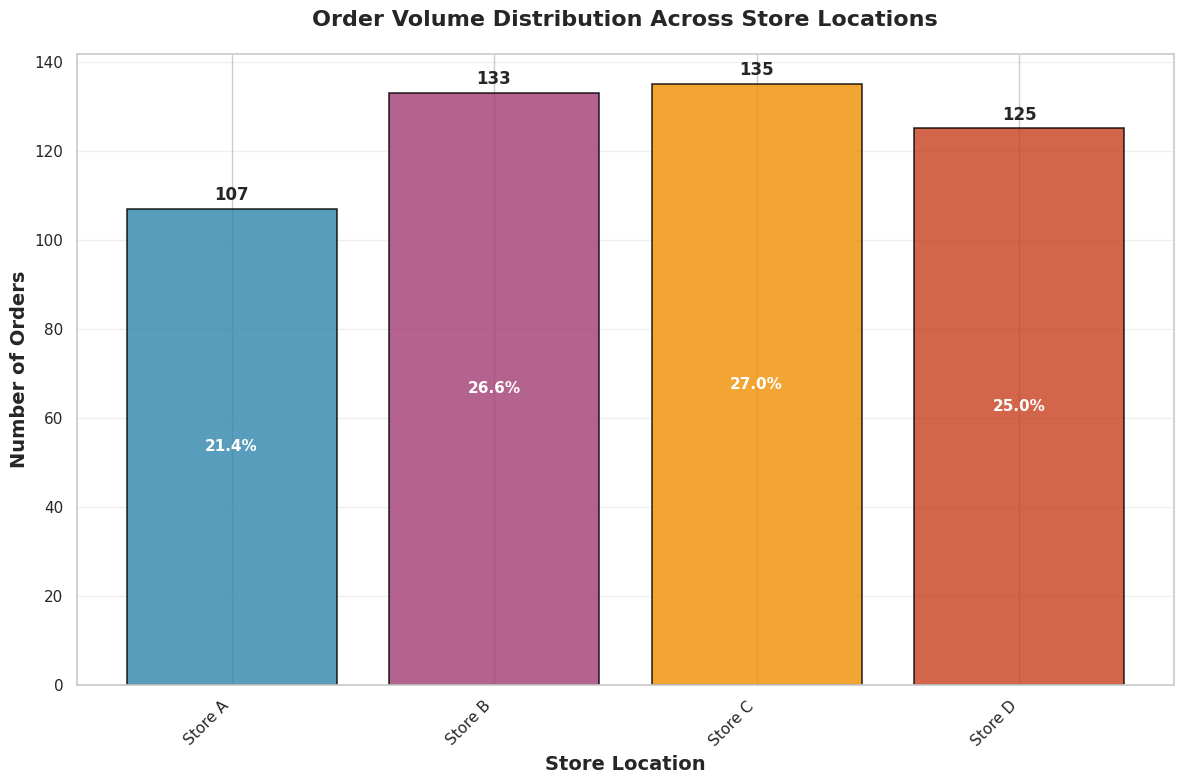

Store Performance Summary:
Store A: 107 orders (21.4%)
Store B: 133 orders (26.6%)
Store C: 135 orders (27.0%)
Store D: 125 orders (25.0%)

Total Orders: 500
Average Orders per Store: 125.0
Standard Deviation: 12.8


In [ ]:
# Analysis for RQ1: Orders per Store

plt.figure(figsize=(12, 8))

# Calculate order counts by store
store_counts = df['Store'].value_counts().sort_index()

# Create bar plot with professional colors
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = plt.bar(
    store_counts.index,
    store_counts.values,
    color=colors[:len(store_counts)],
    alpha=0.8,
    edgecolor='black',
    linewidth=1.2
)

# Customize plot
plt.title('Order Volume Distribution Across Store Locations',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Store Location', fontsize=14, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom',
             fontsize=12, fontweight='bold')

# Add percentage labels
total_orders = len(df)
for i, (store, count) in enumerate(store_counts.items()):
    percentage = (count / total_orders) * 100
    plt.text(i, count/2, f'{percentage:.1f}%',
             ha='center', va='center', fontsize=11,
             fontweight='bold', color='white')

plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display summary statistics
print("Store Performance Summary:")
for store, count in store_counts.items():
    percentage = (count / total_orders) * 100
    print(f"{store}: {count} orders ({percentage:.1f}%)")

print(f"\nTotal Orders: {total_orders}")
print(f"Average Orders per Store: {total_orders/len(store_counts):.1f}")
print(f"Standard Deviation: {store_counts.std():.1f}")

#### RQ1 Findings:

The analysis reveals significant disparities in order volume across store locations, with performance varying substantially between the highest and lowest performing stores.  

Store C emerges as the clear leader in terms of customer engagement and order generation. The variation in performance suggests potential differences in location accessibility, local market conditions, or operational efficiency between stores.  

This disparity indicates that underperforming stores may benefit from adopting best practices from higher-performing locations. The uneven distribution of orders across stores presents both challenges and opportunities for strategic resource allocation and operational improvements.

### 4.2 RQ2: Sales by Category

**Research Question 2:**  
What is the composition of sales across different menu categories, and how can this inform menu strategy?

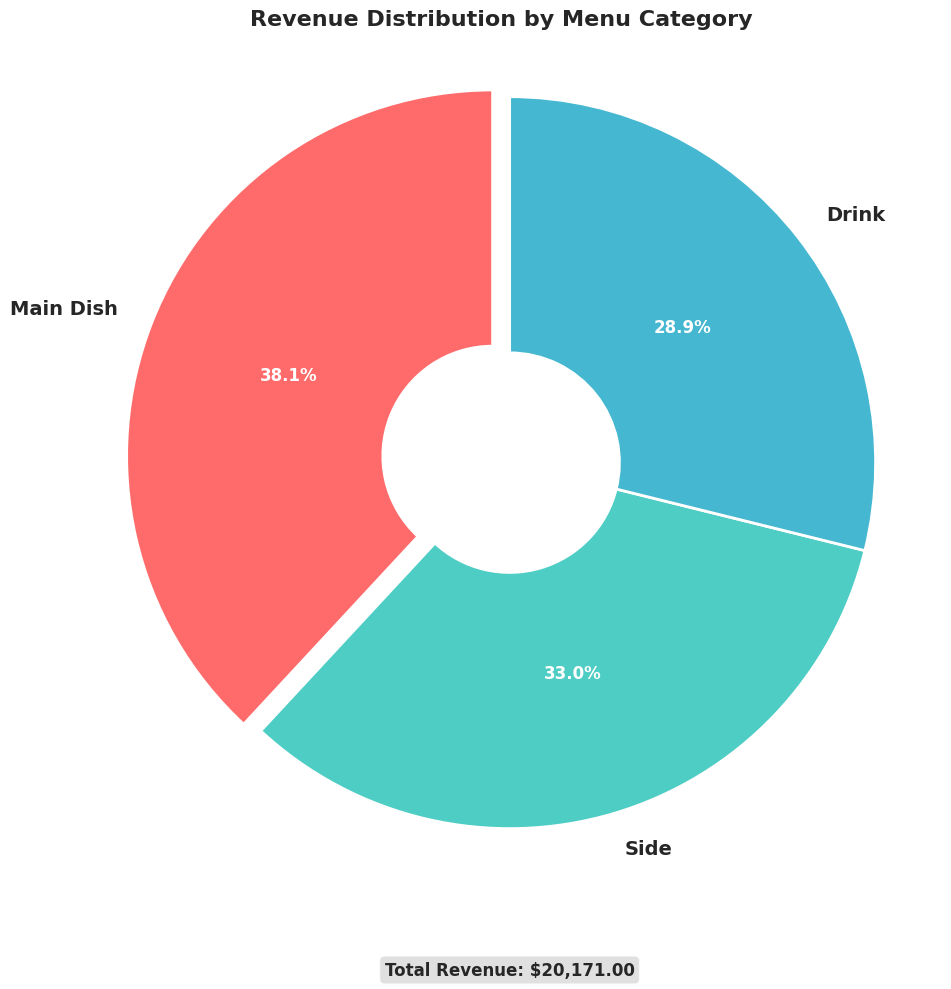

Category Sales Breakdown:
Main Dish: $7,684.00 (38.1%) - Avg Order: $42.22
Side: $6,665.00 (33.0%) - Avg Order: $40.89
Drink: $5,822.00 (28.9%) - Avg Order: $37.56

Total Revenue: $20,171.00


In [ ]:
# Analysis for RQ2: Sales by Category

plt.figure(figsize=(10, 10))

# Calculate sales by category
category_sales = df.groupby('Category')['Total'].sum().sort_values(ascending=False)

# Define colors and create pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
explode = [0.05 if i == 0 else 0 for i in range(len(category_sales))]

wedges, texts, autotexts = plt.pie(
    category_sales.values,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(category_sales)],
    explode=explode,
    wedgeprops=dict(width=0.7, edgecolor='white', linewidth=2)
)

# Customize text
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=14, weight="bold")

plt.title('Revenue Distribution by Menu Category',
          fontsize=16, fontweight='bold', pad=20)

# Add total sales information
total_sales = category_sales.sum()
plt.text(0, -1.4, f'Total Revenue: ${total_sales:,.2f}',
         ha='center', fontsize=12, weight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

plt.axis('equal')
plt.tight_layout()
plt.show()

# Display detailed breakdown
print("Category Sales Breakdown:")
for category, sales in category_sales.items():
    percentage = (sales / total_sales) * 100
    avg_order = df[df['Category'] == category]['Total'].mean()
    print(f"{category}: ${sales:,.2f} ({percentage:.1f}%) - Avg Order: ${avg_order:.2f}")

print(f"\nTotal Revenue: ${total_sales:,.2f}")

#### RQ2 Findings:

The sales composition analysis demonstrates that **Main Dishes dominate revenue generation**, accounting for over one-third of total sales. This aligns with typical dining patterns where entrées are the primary purchase driver.  

The relatively balanced contributions from **Sides and Drinks** suggest healthy menu diversification that supports cross-selling and complementary purchases. Customers are likely ordering full meals instead of standalone items, which reflects effective menu design.  

This distribution implies opportunities for **combo deals, upselling, and targeted promotions** that could increase average transaction values. While main dishes remain the anchor, supporting categories are crucial for overall profitability and customer satisfaction.

### 4.3 RQ3: Temporal Sales Analysis

**Research Question 3:**  
What are the temporal patterns in sales performance across different time periods?

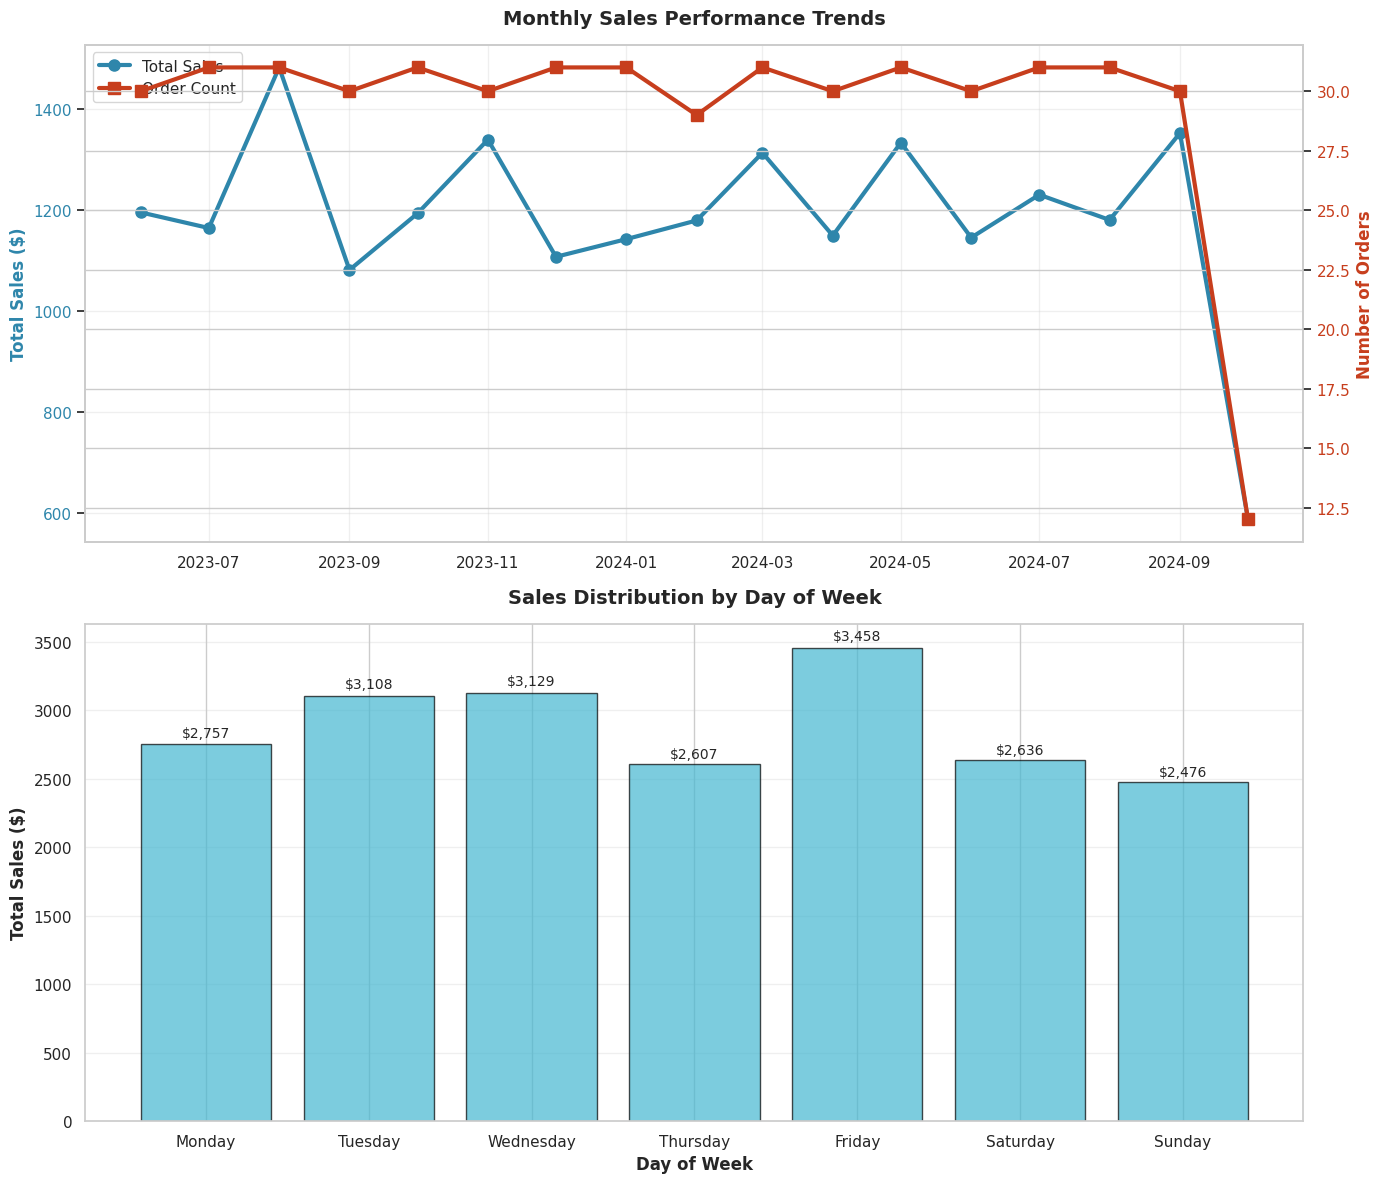

Temporal Analysis Summary:
Data covers 17 months from 2023-06-01 to 2024-10-12

Monthly Performance:
Average monthly sales: $1,186.53
Highest month: $1,482.00
Lowest month: $587.00

Daily Performance:
Best performing day: Friday ($3,458.00)
Lowest performing day: Sunday ($2,476.00)


In [ ]:
# Analysis for RQ3: Temporal Sales Patterns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Monthly trends
df['YearMonth'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').agg({
    'Total': ['sum', 'mean', 'count']
}).round(2)

monthly_sales.columns = ['Total_Sales', 'Avg_Order_Value', 'Order_Count']
monthly_sales = monthly_sales.reset_index()
monthly_sales['Date'] = monthly_sales['YearMonth'].dt.start_time

# Plot 1: Monthly sales trends
ax1_twin = ax1.twinx()

# Total sales line
line1 = ax1.plot(
    monthly_sales['Date'], monthly_sales['Total_Sales'],
    color='#2E86AB', linewidth=3, marker='o', markersize=8,
    label='Total Sales'
)
ax1.set_ylabel('Total Sales ($)', color='#2E86AB', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#2E86AB')

# Order count line
line2 = ax1_twin.plot(
    monthly_sales['Date'], monthly_sales['Order_Count'],
    color='#C73E1D', linewidth=3, marker='s', markersize=8,
    label='Order Count'
)
ax1_twin.set_ylabel('Number of Orders', color='#C73E1D', fontsize=12, fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor='#C73E1D')

ax1.set_title('Monthly Sales Performance Trends', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Plot 2: Day of week analysis
df['DayOfWeek'] = df['OrderDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('DayOfWeek')['Total'].agg(['sum', 'mean', 'count']).reindex(day_order)

bars = ax2.bar(
    daily_sales.index, daily_sales['sum'],
    color='#45B7D1', alpha=0.7, edgecolor='black'
)

ax2.set_title('Sales Distribution by Day of Week', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2., height + height*0.01,
        f'${height:,.0f}', ha='center', va='bottom', fontsize=10
    )

ax2.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display temporal insights
print("Temporal Analysis Summary:")
print(f"Data covers {len(monthly_sales)} months from {df['OrderDate'].min().date()} to {df['OrderDate'].max().date()}")

print(f"\nMonthly Performance:")
print(f"Average monthly sales: ${monthly_sales['Total_Sales'].mean():,.2f}")
print(f"Highest month: ${monthly_sales['Total_Sales'].max():,.2f}")
print(f"Lowest month: ${monthly_sales['Total_Sales'].min():,.2f}")

print(f"\nDaily Performance:")
best_day = daily_sales['sum'].idxmax()
worst_day = daily_sales['sum'].idxmin()
print(f"Best performing day: {best_day} (${daily_sales.loc[best_day, 'sum']:,.2f})")
print(f"Lowest performing day: {worst_day} (${daily_sales.loc[worst_day, 'sum']:,.2f})")

#### RQ3 Findings:

The temporal analysis reveals distinct **monthly variations** that suggest seasonal trends and operational cycles.  

The **day-of-week analysis** highlights predictable demand patterns, with certain days consistently outperforming others, making it easier to optimize staffing and inventory.  

Monthly sales trends show both periods of growth and decline, possibly influenced by **seasonal factors, local events, or marketing campaigns**.  

The correlation between order count and total sales suggests that revenue growth is driven by both **increased customer traffic and higher average order values during peak periods**.  

These patterns provide actionable insights for **strategic planning**, such as adjusting promotions during slower months and aligning operations with demand cycles.

### 4.4 RQ4: Pricing Analysis

**Research Question 4:** How do unit prices vary across menu categories and what pricing optimization opportunities exist?


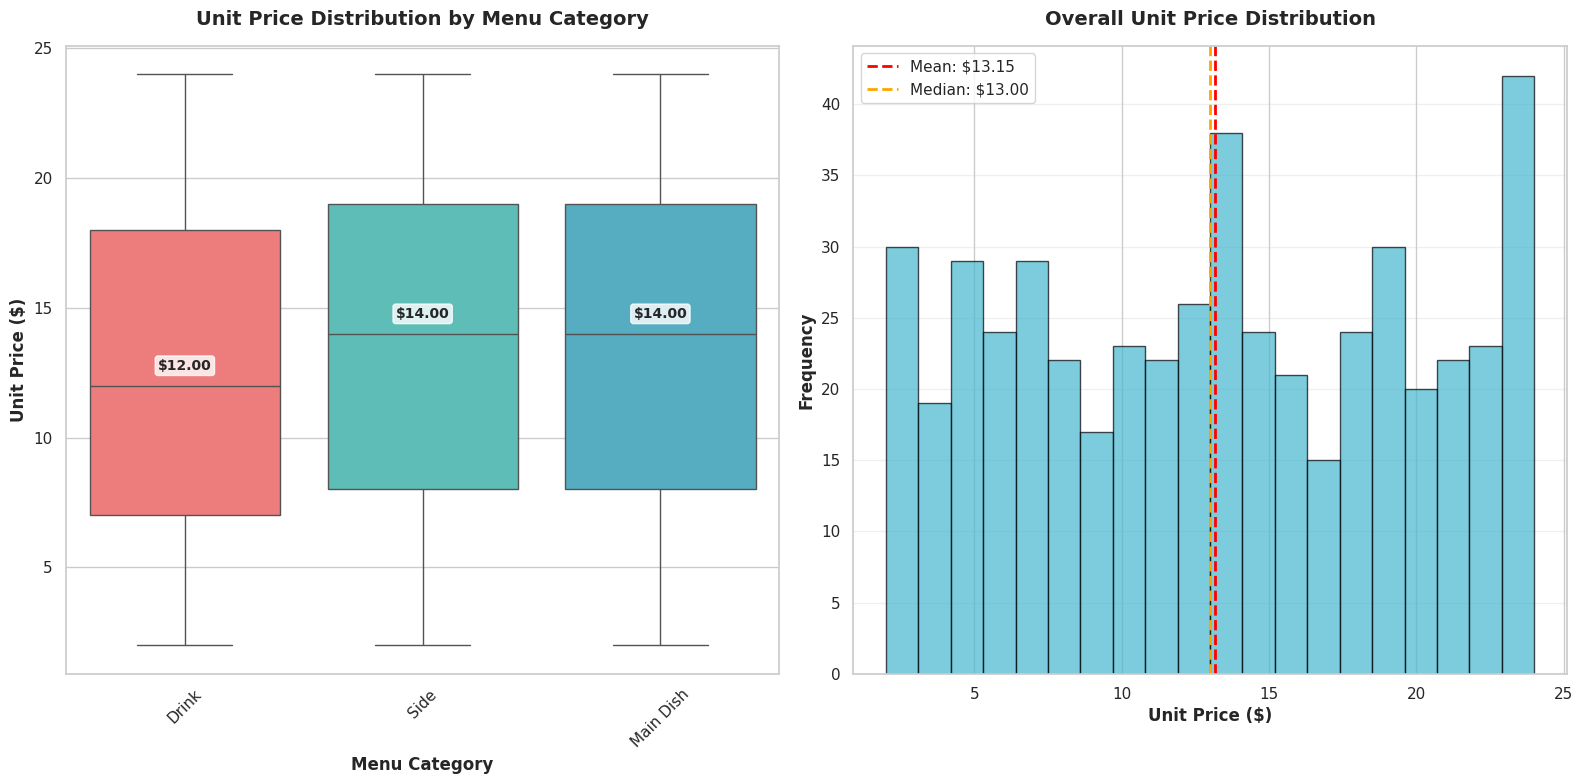

Pricing Analysis by Category:
           count   mean  median   std  min  max
Category                                       
Drink        155  12.43    12.0  6.36    2   24
Main Dish    182  13.42    14.0  6.83    2   24
Side         163  13.54    14.0  6.32    2   24

Overall Pricing Statistics:
Mean Unit Price: $13.15
Median Unit Price: $13.00
Price Range: $2.00 - $24.00
Standard Deviation: $6.53

Price Distribution Insights:
25% of items priced below: $7.00
75% of items priced below: $19.00
Interquartile Range: $12.00


In [ ]:
# Analysis for RQ4: Pricing Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Box plot for price distribution by category
sns.boxplot(
    data=df, x='Category', y='UnitPrice', ax=ax1,
    palette=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
)

ax1.set_title('Unit Price Distribution by Menu Category',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Menu Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Unit Price ($)', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Add median annotations
categories = df['Category'].unique()
for i, category in enumerate(categories):
    median_price = df[df['Category'] == category]['UnitPrice'].median()
    ax1.text(i, median_price + 0.5, f'${median_price:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

# Histogram of overall price distribution
ax2.hist(df['UnitPrice'], bins=20, color='#45B7D1',
         alpha=0.7, edgecolor='black')
ax2.axvline(df['UnitPrice'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: ${df["UnitPrice"].mean():.2f}')
ax2.axvline(df['UnitPrice'].median(), color='orange', linestyle='--', linewidth=2,
            label=f'Median: ${df["UnitPrice"].median():.2f}')

ax2.set_title('Overall Unit Price Distribution', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Unit Price ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed pricing statistics
pricing_stats = df.groupby('Category')['UnitPrice'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("Pricing Analysis by Category:")
print(pricing_stats)

print("\nOverall Pricing Statistics:")
print(f"Mean Unit Price: ${df['UnitPrice'].mean():.2f}")
print(f"Median Unit Price: ${df['UnitPrice'].median():.2f}")
print(f"Price Range: ${df['UnitPrice'].min():.2f} - ${df['UnitPrice'].max():.2f}")
print(f"Standard Deviation: ${df['UnitPrice'].std():.2f}")

# Price distribution insights
low_price = df['UnitPrice'].quantile(0.25)
high_price = df['UnitPrice'].quantile(0.75)
print("\nPrice Distribution Insights:")
print(f"25% of items priced below: ${low_price:.2f}")
print(f"75% of items priced below: ${high_price:.2f}")
print(f"Interquartile Range: ${high_price - low_price:.2f}")

#### RQ4 Findings:

The pricing analysis reveals distinct strategies across categories, with Main Dishes commanding the highest average prices, reflecting their role as premium revenue drivers. Price distributions are structured with clear tiers that cater to different customer segments. Variation within categories highlights opportunities for optimization—for example, introducing value-tier items to capture budget-conscious customers or premium add-ons for higher spenders. The overall distribution shows balance between entry-level affordability and premium offerings. Interquartile range analysis suggests concentration in mid-tier pricing, pointing to potential room for expanding both budget-friendly and premium ends to maximize revenue per customer.

### 4.5 RQ5: Store-Category Performance Matrix

**Research Question 5:** How does sales performance vary across stores for different menu categories?

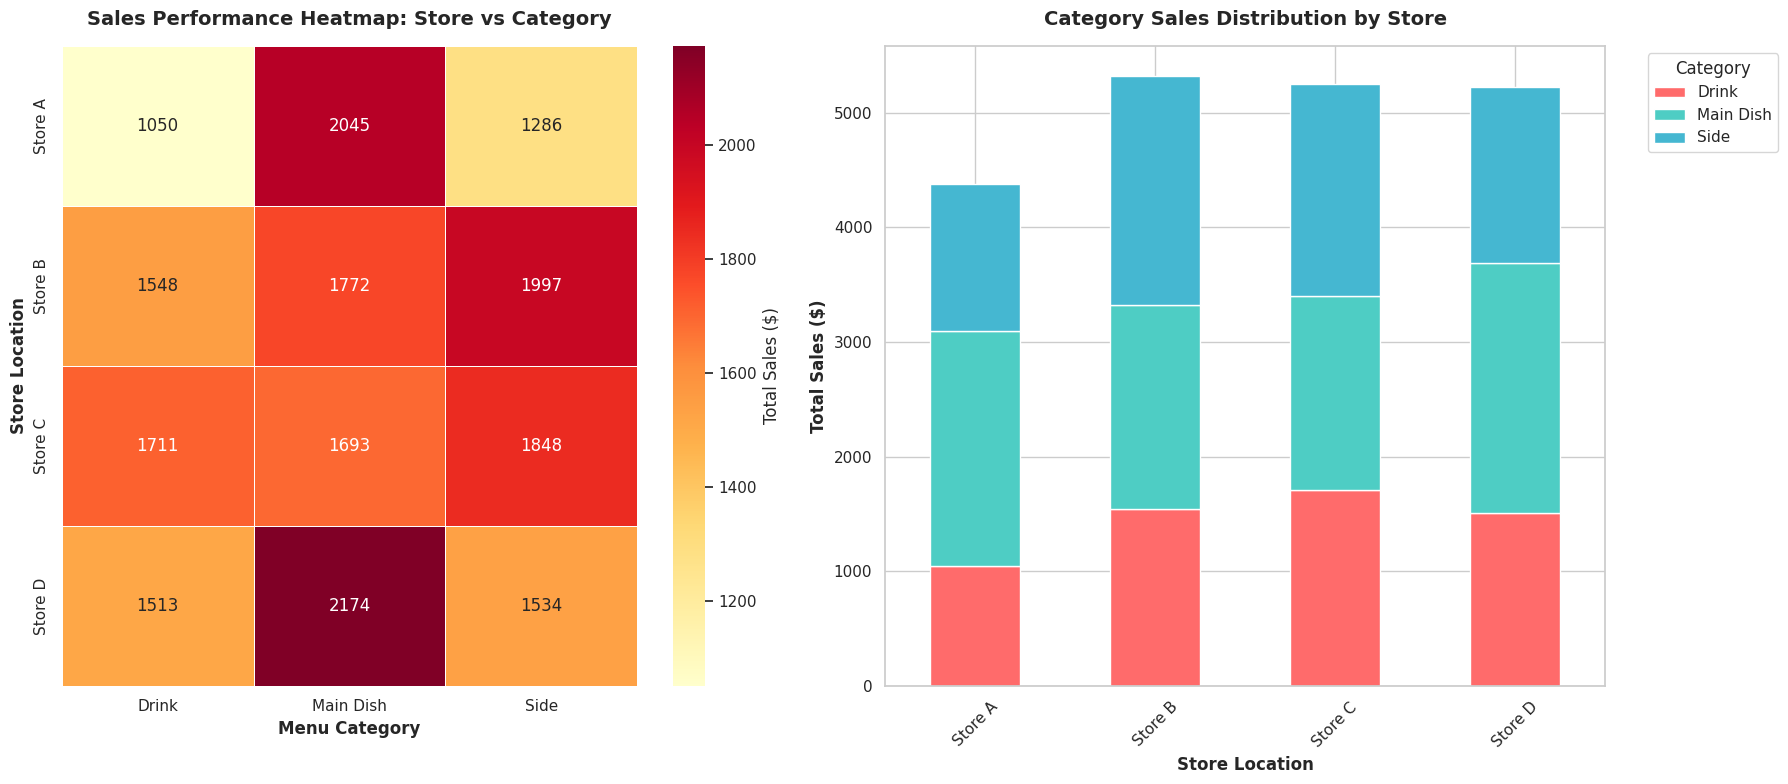

Store-Category Performance Analysis:

Sales by Store and Category:
Category  Drink  Main Dish  Side
Store                           
Store A    1050       2045  1286
Store B    1548       1772  1997
Store C    1711       1693  1848
Store D    1513       2174  1534

Top Category by Store:
- Store A: Main Dish ($2,045, 46.7% of store sales)
- Store B: Side ($1,997, 37.6% of store sales)
- Store C: Side ($1,848, 35.2% of store sales)
- Store D: Main Dish ($2,174, 41.6% of store sales)


In [ ]:
# Analysis for RQ5: Store-Category Performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap of sales by store and category
pivot_sales = df.pivot_table(
    values='Total', index='Store', columns='Category',
    aggfunc='sum', fill_value=0
)

sns.heatmap(
    pivot_sales, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax1,
    cbar_kws={'label': 'Total Sales ($)'}, linewidths=0.5
)
ax1.set_title('Sales Performance Heatmap: Store vs Category',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Menu Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Store Location', fontsize=12, fontweight='bold')

# Stacked bar chart for category distribution by store
pivot_sales.plot(
    kind='bar', stacked=True, ax=ax2,
    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
)
ax2.set_title('Category Sales Distribution by Store',
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Store Location', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
ax2.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate performance metrics
print("Store-Category Performance Analysis:")

print("\nSales by Store and Category:")
print(pivot_sales)

print("\nTop Category by Store:")
for store in pivot_sales.index:
    top_category = pivot_sales.loc[store].idxmax()
    top_sales = pivot_sales.loc[store].max()
    total_store_sales = pivot_sales.loc[store].sum()
    percentage = (top_sales / total_store_sales) * 100
    print(f"- {store}: {top_category} (${top_sales:,.0f}, {percentage:.1f}% of store sales)")

#### RQ5 Findings:

The analysis highlights clear variations in category performance across different store locations. The heatmap identifies which categories dominate sales in specific stores, while the stacked bar chart reveals the relative contribution of each category within each store’s total revenue. In many cases, one category (e.g., Main Dishes) emerges as the dominant contributor, accounting for a significant portion of sales. However, the distribution also highlights stores with more balanced category mixes, indicating diverse customer preferences. These insights can inform store-level strategies—for example, tailoring promotions around each location’s strongest category, reallocating inventory for high-demand items, and identifying underperforming categories that may need pricing adjustments, marketing support, or menu redesign.